In [ ]:
#50
#データダウンロード
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
!unzip NewsAggregatorDataset.zip

--2021-10-31 14:38:26--  https://archive.ics.uci.edu/ml/machine-learning-databases/00359/NewsAggregatorDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29224203 (28M) [application/x-httpd-php]
Saving to: ‘NewsAggregatorDataset.zip’

NewsAggregatorDatas 100%[===================>]  27.87M  11.6MB/s    in 2.4s    

2021-10-31 14:38:29 (11.6 MB/s) - ‘NewsAggregatorDataset.zip’ saved [29224203/29224203]

Archive:  NewsAggregatorDataset.zip
  inflating: 2pageSessions.csv       
   creating: __MACOSX/
  inflating: __MACOSX/._2pageSessions.csv  
  inflating: newsCorpora.csv         
  inflating: __MACOSX/._newsCorpora.csv  
  inflating: readme.txt              
  inflating: __MACOSX/._readme.txt   


In [ ]:
!cat ./readme.txt

SUMMARY: Dataset of references (urls) to news web pages

DESCRIPTION: Dataset of references to news web pages collected from an online aggregator in the period from March 10 to August 10 of 2014. The resources are grouped into clusters that represent pages discussing the same news story. The dataset includes also references to web pages that point (has a link to) one of the news page in the collection.

TAGS: web pages, news, aggregator, classification, clustering

LICENSE: Public domain - Due to restrictions on content and use of the news sources, the corpus is limited to web references (urls) to web pages and does not include any text content. The references have been retrieved from the news aggregator through traditional web browsers. 

FILE ENCODING: UTF-8

FORMAT: Tab delimited CSV files. 

DATA SHAPE AND STATS: 422937 news pages and divided up into:

152746 	news of business category
108465 	news of science and technology category
115920 	news of business category
 45615 	news of

In [ ]:
# 行数の確認
!wc -l ./newsCorpora.csv

422937 ./newsCorpora.csv


In [ ]:
# 先頭15行の確認
!head -15 ./newsCorpora.csv

1	Fed official says weak data caused by weather, should not slow taper	http://www.latimes.com/business/money/la-fi-mo-federal-reserve-plosser-stimulus-economy-20140310,0,1312750.story\?track=rss	Los Angeles Times	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.latimes.com	1394470370698
2	Fed's Charles Plosser sees high bar for change in pace of tapering	http://www.livemint.com/Politics/H2EvwJSK2VE6OF7iK1g3PP/Feds-Charles-Plosser-sees-high-bar-for-change-in-pace-of-ta.html	Livemint	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.livemint.com	1394470371207
3	US open: Stocks fall after Fed official hints at accelerated tapering	http://www.ifamagazine.com/news/us-open-stocks-fall-after-fed-official-hints-at-accelerated-tapering-294436	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www.ifamagazine.com	1394470371550
4	Fed risks falling 'behind the curve', Charles Plosser says	http://www.ifamagazine.com/news/fed-risks-falling-behind-the-curve-charles-plosser-says-294430	IFA Magazine	b	ddUyU0VZz0BRneMioxUPQVP6sIxvM	www

In [ ]:
  #最後15行の確認
  !tail -15 ./newsCorpora.csv

422923	British Ebola sufferer gets new drug	http://www.echo.net.au/2014/08/british-ebola-sufferer-gets-new-drug/	Echonetdaily	m	dhhnSHVoyA7ENBM3boDX_D_-3PV6M	www.echo.net.au	1409228456773
422924	AFDB Boss Says Ebola Infected Countries May Lose1.5% GDP	http://leadership.ng/business/382219/afdb-boss-says-ebola-infected-countries-may-lose1-5-gdp	Leadership Newspapers	m	dhhnSHVoyA7ENBM3boDX_D_-3PV6M	leadership.ng	1409228457129
422925	Cincinnati Children's to rebuild boy's throat using his rib (Video)	http://www.bizjournals.com/cincinnati/news/2014/08/27/cincinnati-children-s-to-rebuild-boy-s-throat.html	Cincinnati Business Courier	m	dpcLMoJD69UYMXMxaoEFnWql9YjQM	www.bizjournals.com	1409229187092
422926	Cincinnati doctors use child's rib to rebuild his throat	http://www.jrn.com/kgun9/now-trending/Cincinnati-doctors-use-childs-rib-to-rebuild-his-throat-272896791.html	KGUN 9	m	dpcLMoJD69UYMXMxaoEFnWql9YjQM	www.jrn.com	1409229187393
422927	Cincinnati Children's surgeons rebuild throat of 4-yea

In [ ]:
# 読込時のエラー回避のためダブルクォーテーションをシングルクォーテーションに置換
!sed -e 's/"/'\''/g' ./newsCorpora.csv > ./newsCorpora_re.csv

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_csv('./newsCorpora_re.csv', header=None, sep='\t', names=['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP']) #具体例からこのように分ける

# データの抽出
df = df.loc[df['PUBLISHER'].isin(['Reuters', 'Huffington Post', 'Businessweek', 'Contactmusic.com', 'Daily Mail']), ['TITLE', 'CATEGORY']] #publisherが”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”であるものの、そのカテゴリ名と記事見出しを抽出 isin https://vector-ium.com/pandas-isin/  loc(列ラベル) https://note.nkmk.me/python-pandas-at-iat-loc-iloc/

# データの分割
train, valid_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42, stratify=df['CATEGORY']) #学習データ80%とその他20%に分ける train_test_splitについて https://qiita.com/KyleKatarn/items/2afa6787f04f28e2cd2d
valid, test = train_test_split(valid_test, test_size=0.5, shuffle=True, random_state=42, stratify=valid_test['CATEGORY']) #その他に分けられたデータを半分ずつ検証データと評価データに分類(全体から見ると10%,10%)

# データの保存
train.to_csv('./train.txt', sep='\t', index=False)
valid.to_csv('./valid.txt', sep='\t', index=False)
test.to_csv('./test.txt', sep='\t', index=False)

# 事例数の確認
print('【学習データ】')
print(train['CATEGORY'].value_counts())
print('【検証データ】')
print(valid['CATEGORY'].value_counts())
print('【評価データ】')
print(test['CATEGORY'].value_counts())

【学習データ】
b    4501
e    4235
t    1220
m     728
Name: CATEGORY, dtype: int64
【検証データ】
b    563
e    529
t    153
m     91
Name: CATEGORY, dtype: int64
【評価データ】
b    563
e    530
t    152
m     91
Name: CATEGORY, dtype: int64


In [ ]:
#確認
!head -15 ./train.txt

TITLE	CATEGORY
UPDATE 1-Sandwich chain Quiznos files for bankruptcy protection	b
Iraq concerns lift top-rated euro zone bonds but Fed limits gains	b
China Manufacturing Gauge Rises in Stabilization Sign: Economy	b
Crucifixion: A New Way to Think About Jesus' Death	e
Tracy Morgan still critical but 'doing better' following deadly crash which killed his  ...	e
FOREX-Dollar off to slow start in event-packed week	b
Alstom should be a good investment for France, says CEO Kron	b
Diabetes-Related Problems Have Decreased Over Last 20 Years	m
2 Cases Of Ebola Confirmed In Liberia	m
'You Are Not Pregnant. We're Pregnant!' Mila Kunis Tells Off Overeager Fathers  ...	e
Home > Justin Bieber > Justin Bieber Sends Selena Gomez $10k Flowers?	e
Data storage firm Box files for US IPO of about $250 million	b
Cocaine use in U.S. cut in HALF while marijuana use jumps 30 per cent	m
UPDATE 1-HKMA intervenes as deals, China optimism spur Hong Kong dollar  ...	b


In [ ]:
#51
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer #countvectorizerを使う
import nltk #https://www.haya-programming.com/entry/2018/03/21/234126  https://qiita.com/m__k/items/ffd3b7774f2fde1083fa
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

#名詞の抽出を目指す(NNとNNSとNNPとNNPS)

train_title_list = []
valid_title_list = []
test_title_list = []

train_noun_list = []
valid_noun_list = []
test_noun_list = []

def add_pos_tag(filename, title_list): #品詞タグをつける
  f = open(filename,mode='r') # 1行ずつ読込
  next(f) #0行目はスルー(TITLE)
  for line in f:
      fields = line.split('\t') #TITLEがfields[0],CATEGORYがfields[1]に収容
      titles =  nltk.word_tokenize(fields[0]) #タイトルを単語ごとに,で分割
      title_list.append(nltk.pos_tag(titles)) 
  f.close()



def extract_noun(title_list,noun_list): #品詞タグを判断材料に名詞を抽出
  for i in range(len(title_list)):
    tentative_list = []
    for j in range(len(title_list[i])):
      if 'NN' in title_list[i][j][1]: #名詞抽出(名詞はNNとNNSとNNPとNNPSでありいずれもNNが含まれる)
        tentative_list.append(title_list[i][j][0])
    noun_list.append(' '.join(tentative_list))


add_pos_tag('./train.txt',train_title_list)
add_pos_tag('./valid.txt',valid_title_list)
add_pos_tag('./test.txt',test_title_list)

extract_noun(train_title_list,train_noun_list)
extract_noun(valid_title_list,valid_noun_list)
extract_noun(test_title_list,test_noun_list)


# CountVectorizer
vec_count = CountVectorizer()

vec_count.fit(np.array(train_noun_list))
X_train = vec_count.transform(np.array(train_noun_list))
X_valid = vec_count.transform(np.array(valid_noun_list))
X_test = vec_count.transform(np.array(test_noun_list))

X_train = pd.DataFrame(X_train.toarray(), columns=vec_count.get_feature_names())
X_valid = pd.DataFrame(X_valid.toarray(), columns=vec_count.get_feature_names())
X_test = pd.DataFrame(X_test.toarray(), columns=vec_count.get_feature_names())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#51 txt保存
X_train.to_csv('./X_train.txt', sep='\t', index=False)
X_valid.to_csv('./X_valid.txt', sep='\t', index=False)
X_test.to_csv('./X_test.txt', sep='\t', index=False)

In [ ]:
#51(確認)
X_train

,08,0ut,106,13,14,150m,18,186f,2012,2013,22,24,25,29k,2billion,35,35s,400million,49ers,50,5m,60,650million,69bn,7bn,80s,911,a350,aa,aaa,aaliyah,aaron,abandon,abandoned,abba,abbott,abbvie,abby,abc,abdi,...,yovanna,yr,ysidro,yuan,yukos,yum,zac,zach,zack,zadan,zaki,zambia,zamperini,zara,zayn,zealand,zebra,zendaya,zeppelin,zero,zew,zhang,ziering,ziff,zillow,zimmerman,zions,zip,zloty,zoe,zombie,zombies,zone,zooey,zoosk,zuckerberg,zynga,zâ,œlousyâ,œpiece
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10682,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#52　https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569 ロジスティック回帰モデル
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,max_iter=10000)
clf.fit(X_train, train['CATEGORY'])           

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#53
import numpy as np

def score_clf(clf, X):
  return [np.max(clf.predict_proba(X), axis=1), clf.predict(X)]
  
train_pred = score_clf(clf, X_train)
test_pred = score_clf(clf, X_test)

print(train_pred)

[array([0.89208619, 0.99981925, 0.99422351, ..., 0.92984158, 0.99059908,
       0.95454717]), array(['b', 'b', 'b', ..., 'e', 'b', 'b'], dtype=object)]


In [ ]:
#54 accuracy_score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(train['CATEGORY'], train_pred[1])
test_accuracy = accuracy_score(test['CATEGORY'], test_pred[1])
print(f'正解率（学習データ）：{train_accuracy:.3f}') #小数点以下3桁表示
print(f'正解率（評価データ）：{test_accuracy:.3f}')

正解率（学習データ）：0.990
正解率（評価データ）：0.924


[[4475    6    2   18]
 [   7 4226    0    2]
 [   9   10  708    1]
 [  48    8    0 1164]]


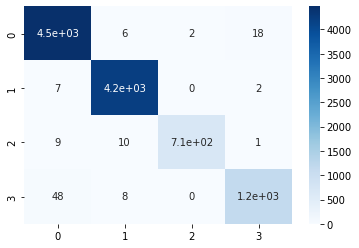

In [ ]:
#55 https://note.nkmk.me/python-sklearn-confusion-matrix-score/ 混同行列,適合率・再現率・F1値
from sklearn.metrics import confusion_matrix
import seaborn as sns #混同行列を図示
import matplotlib.pyplot as plt #表示用

# 学習データ
train_cm = confusion_matrix(train['CATEGORY'], train_pred[1])
print(train_cm)
sns.heatmap(train_cm, annot=True, cmap='Blues')
plt.show()

[[544   6   1  12]
 [ 11 516   2   1]
 [ 12  13  63   3]
 [ 25  15   1 111]]


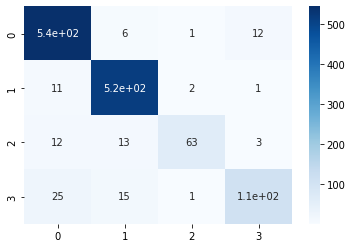

In [ ]:
# 評価データ
test_cm = confusion_matrix(test['CATEGORY'], test_pred[1])
print(test_cm)
sns.heatmap(test_cm, annot=True, cmap='Blues')
plt.show()

In [ ]:
#56
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_scores(y_true, y_pred):
  # 適合率
  precision = precision_score(test['CATEGORY'], test_pred[1], average=None, labels=['b', 'e', 't', 'm'])  # Noneを指定するとクラスごとの精度をndarrayで返す
  precision = np.append(precision, precision_score(y_true, y_pred, average='micro'))  # 末尾にマイクロ平均を追加
  precision = np.append(precision, precision_score(y_true, y_pred, average='macro'))  # 末尾にマクロ平均を追加

  # 再現率
  recall = recall_score(test['CATEGORY'], test_pred[1], average=None, labels=['b', 'e', 't', 'm'])
  recall = np.append(recall, recall_score(y_true, y_pred, average='micro'))
  recall = np.append(recall, recall_score(y_true, y_pred, average='macro'))

  # F1スコア
  f1 = f1_score(test['CATEGORY'], test_pred[1], average=None, labels=['b', 'e', 't', 'm'])
  f1 = np.append(f1, f1_score(y_true, y_pred, average='micro'))
  f1 = np.append(f1, f1_score(y_true, y_pred, average='macro'))

  # 結果を結合してデータフレーム化
  scores = pd.DataFrame({'適合率': precision, '再現率': recall, 'F1スコア': f1},
                        index=['b', 'e', 't', 'm', 'マイクロ平均', 'マクロ平均'])

  return scores

In [ ]:
print(calculate_scores(test['CATEGORY'], test_pred[1]))

             適合率       再現率     F1スコア
b       0.918919  0.966252  0.941991
e       0.938182  0.973585  0.955556
t       0.874016  0.730263  0.795699
m       0.940299  0.692308  0.797468
マイクロ平均  0.923653  0.923653  0.923653
マクロ平均   0.917854  0.840602  0.872679


In [ ]:
#57
features = X_train.columns.values
index = [i for i in range(1, 11)]
for c, coef in zip(clf.classes_, clf.coef_):
  print(f'【カテゴリ】{c}')
  best10 = pd.DataFrame(features[np.argsort(coef)[::-1][:10]], columns=['重要度上位'], index=index).T #np.argsort https://note.nkmk.me/python-numpy-sort-argsort/
  worst10 = pd.DataFrame(features[np.argsort(coef)[:10]], columns=['重要度下位'], index=index).T
  display(pd.concat([best10, worst10], axis=0))
  print('\n')

【カテゴリ】b


,1,2,3,4,5,6,7,8,9,10
重要度上位,ecb,fed,bank,ukraine,stocks,yellen,oil,euro,percent,china
重要度下位,aereo,activision,hat,subscription,ebola,virus,twitch,iliad,nintendo,un




【カテゴリ】e


,1,2,3,4,5,6,7,8,9,10
重要度上位,kardashian,chris,movie,cyrus,thrones,paul,film,beyonce,miley,spotify
重要度下位,google,china,scientists,study,gm,data,billion,bln,sales,microsoft




【カテゴリ】m


,1,2,3,4,5,6,7,8,9,10
重要度上位,ebola,cancer,fda,mers,drug,cases,study,doctors,cdc,cigarettes
重要度下位,twitter,facebook,gm,dimon,apple,climate,deal,amazon,profit,netflix




【カテゴリ】t


,1,2,3,4,5,6,7,8,9,10
重要度上位,facebook,google,climate,microsoft,apple,nasa,activision,neutrality,tesla,moon
重要度下位,percent,stocks,body,fed,spotify,drug,move,thrones,lawmakers,kids


googleはtだと重要度上位だが、eだと下位になっている

In [ ]:
#58(30分くらいかかる)
from tqdm import tqdm #実行が長いので進捗が分かるバーを導入 https://qiita.com/pontyo4/items/76145cb10e030ad8186a

result = []
for C in tqdm(np.logspace(-5, 4, 10, base=10)):
  # モデルの学習
  clf = LogisticRegression(random_state=42, max_iter=10000, C=C)
  clf.fit(X_train, train['CATEGORY'])

  # 予測値の取得
  train_pred = score_clf(clf, X_train)
  valid_pred = score_clf(clf, X_valid)
  test_pred = score_clf(clf, X_test)

  # 正解率の算出
  train_accuracy = accuracy_score(train['CATEGORY'], train_pred[1])
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1])
  test_accuracy = accuracy_score(test['CATEGORY'], test_pred[1])

  # 結果の格納
  result.append([C, train_accuracy, valid_accuracy, test_accuracy])

100%|██████████| 10/10 [15:56<00:00, 95.69s/it] 


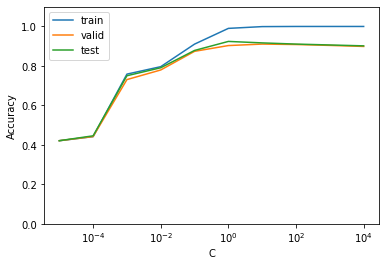

In [ ]:
# グラフ
result = np.array(result).T
plt.plot(result[0], result[1], label='train')
plt.plot(result[0], result[2], label='valid')
plt.plot(result[0], result[3], label='test')
plt.ylim(0, 1.1)
plt.ylabel('Accuracy')
plt.xscale ('log')
plt.xlabel('C')
plt.legend()
plt.show()

C=1 より大きいと過学習?

In [ ]:
#59(準備)
!pip install optuna

     |████████████████████████████████| 308 kB 13.7 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 209 kB 70.2 MB/s 
     |████████████████████████████████| 75 kB 3.0 MB/s 
     |████████████████████████████████| 111 kB 88.7 MB/s 
     |████████████████████████████████| 144 kB 83.5 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=ee3953521b4dd62f433f21e50d2cabcffa330ec59914d1df9035b406994da5cb
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
#59
import optuna # optuna https://qiita.com/studio_haneya/items/2dc3ba9d7cafa36ddffa

# 最適化対象を関数で指定
def objective_clf(trial):
  # チューニング対象パラメータのセット 
  l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1) #l1_ratioはL1正則化とL2正則化のバランスを指定する(0～1の値で指定)
  C = trial.suggest_loguniform('C', 1e-4, 1e4) #10^-4から10^4くらいの範囲を探索

  # モデルの学習 https://qiita.com/FujiedaTaro/items/5784eda386146f1fd6e7 , http://taustation.com/scikit-learn-logisticregression/ を参考にパラメータを決めていく
  clf = LogisticRegression(random_state=42, 
                          max_iter=10000, 
                          penalty='elasticnet', 
                          solver='saga', 
                          l1_ratio=l1_ratio, 
                          C=C)
  clf.fit(X_train, train['CATEGORY'])

  # 予測値の取得
  valid_pred = score_clf(clf, X_valid)

  # 正解率の算出
  valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1])    

  return valid_accuracy 

In [ ]:
# 最適化
study = optuna.create_study(direction='maximize')
study.optimize(objective_clf, timeout=3600) #1時間程度で打ち切り

# 結果の表示
print('Best trial:')
trial = study.best_trial
print('  Value: {:.3f}'.format(trial.value)) #小数点3桁表示
print('  Params: ')
for key, value in trial.params.items():
  print('    {}: {}'.format(key, value))

[I 2021-10-31 15:07:43,466] A new study created in memory with name: no-name-c0b12025-3c7c-403e-a284-350fbdf65aa7
[I 2021-10-31 17:03:52,310] Trial 0 finished with value: 0.9049401197604791 and parameters: {'l1_ratio': 0.37942216994373135, 'C': 236.51860653710773}. Best is trial 0 with value: 0.9049401197604791.


Best trial:
  Value: 0.905
  Params: 
    l1_ratio: 0.37942216994373135
    C: 236.51860653710773


こちらではC=236, l1_ratio=0.38くらいの時最良となった。

In [ ]:
# パラメータの設定上で求めたCやl1_ratioを用いてロジスティック回帰をする
l1_ratio = trial.params['l1_ratio']
C = trial.params['C']

# モデルの学習
clf = LogisticRegression(random_state=42, 
                        max_iter=10000, 
                        penalty='elasticnet', 
                        solver='saga', 
                        l1_ratio=l1_ratio, 
                        C=C)
clf.fit(X_train, train['CATEGORY'])

# 予測値の取得
train_pred = score_clf(clf, X_train)
valid_pred = score_clf(clf, X_valid)
test_pred = score_clf(clf, X_test)

# 正解率の算出
train_accuracy = accuracy_score(train['CATEGORY'], train_pred[1]) 
valid_accuracy = accuracy_score(valid['CATEGORY'], valid_pred[1]) 
test_accuracy = accuracy_score(test['CATEGORY'], test_pred[1]) 

print(f'正解率（学習データ）：{train_accuracy:.3f}')
print(f'正解率（検証データ）：{valid_accuracy:.3f}')
print(f'正解率（評価データ）：{test_accuracy:.3f}')

正解率（学習データ）：0.999
正解率（検証データ）：0.905
正解率（評価データ）：0.908
